### Задача 1

Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [1]:
zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]
ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
x = np.array(zp)
y = np.array(ks)

In [4]:
b = (np.mean(x*y) - np.mean(x)*np.mean(y))/(np.mean(x**2)-np.mean(x)**2)
b

In [5]:
a = np.mean(y)-b*np.mean(x)
a

In [6]:
y_hat = a + b*x

In [7]:
# кажется b должен рассчитываться по-другому и быть в районе 6. но что-то пошло не так... :(
y_bx = b*x

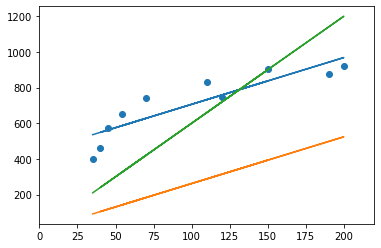

In [8]:
plt.scatter(x, y)
plt.xlim(0, 220)
plt.plot(x, y_hat)
plt.plot(x, y_bx)
plt.plot(x, x*6)
plt.show()

In [9]:
mse = ((y - y_hat)**2).sum()/y.size
mse

6470.414201176658

### Задача 2

Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [10]:
def mse(b1, y, x, n=10):
    return np.sum(b1*x - y)**2/n

def mse_p(b1, y, x, n=10):
    return (2/n)*(np.sum((b1*x - y)*x))

In [11]:
alpha = 1e-6
b1 = 1.1
n = x.size
count = 1300
for i in range(count):
    b1 -=alpha*mse_p(b1, y, x)
    if i%100 == 0:
        print(f'Iter: {i} b1={b1} mse={mse(b1,y,x)}')

Iter: 0 b1=1.23197488 mse=3421989.6468174844
Iter: 100 b1=5.604869386365851 mse=200410.0150326528
Iter: 200 b1=5.872388092043406 mse=130964.78688224145
Iter: 300 b1=5.888753970018103 mse=127194.06768724191
Iter: 400 b1=5.889755178368017 mse=126965.17583883367
Iter: 500 b1=5.889816428865025 mse=126951.1797107649
Iter: 600 b1=5.889820175960607 mse=126950.32350063794
Iter: 700 b1=5.8898204051950795 mse=126950.27112072892
Iter: 800 b1=5.889820419218856 mse=126950.26791630655
Iter: 900 b1=5.889820420076783 mse=126950.26772027086
Iter: 1000 b1=5.889820420129267 mse=126950.26770827845
Iter: 1100 b1=5.889820420132479 mse=126950.26770754442
Iter: 1200 b1=5.889820420132673 mse=126950.26770750014


### Задача 3

В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, а в каких - таблица критических точек распределения Стьюдента?

**Распределение стьюдента используется когда небольшое количество данных (меньше 100), когда достаточно большое количество данных распределение Стьюдента приближается к стандартному**

### Задача 4

*4. Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

In [12]:
def mse_p0(b0, b1, y, x, n=10):
    return (2/n)*(np.sum((b0 + b1*x - y)))

def mse_p1(b0, b1, y, x, n=10):
    return (2/n)*(np.sum((b0 + b1*x - y)*x))

In [14]:
alpha = 1e-6
b1 = 1.1
b0 = 0.9
n = x.size
count = 1300
for i in range(count):
    b0 -=alpha*mse_p0(b0, b1, y, x)
    b1 -=alpha*mse_p1(b0, b1, y, x)
    if i%100 == 0:
        print(f'Iter: {i} b1={b0} b1={b1} mse={mse(b1,y,x)}')

Iter: 0 b1=0.90119492 b1=1.231792117670224 mse=3422206.4675768376
Iter: 100 b1=0.9558210427846052 b1=5.59832616737201 mse=202292.9513681165
Iter: 200 b1=0.9802711135112138 b1=5.865260521163687 mse=132624.20558702468
Iter: 300 b1=1.002874321463162 b1=5.881432851448954 mse=128874.05427610718
Iter: 400 b1=1.0253634907700953 b1=5.882266717795455 mse=128682.14967954632
Iter: 500 b1=1.0478446139077957 b1=5.882162377401726 mse=128706.154575498
Iter: 600 b1=1.0703241742193168 b1=5.882000657181084 mse=128743.36488819688
Iter: 700 b1=1.0928025683284897 b1=5.881835435063288 mse=128781.38650885197
Iter: 800 b1=1.1152798205500916 b1=5.881670006623144 mse=128819.46123341825
Iter: 900 b1=1.1377559324257027 b1=5.881504573442136 mse=128857.54267701507
Iter: 1000 b1=1.160230904103923 b1=5.881339147850087 mse=128895.62800126639
Iter: 1100 b1=1.182704735648145 b1=5.881173730600784 mse=128933.71703181812
Iter: 1200 b1=1.2051774271165463 b1=5.881008321739933 mse=128971.80975729197


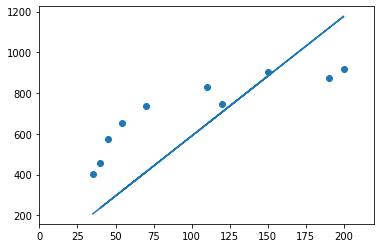

In [15]:
plt.scatter(x, y)
plt.xlim(0, 220)
plt.plot(x, b0 + b1*x)
plt.show()